In [398]:
#Initials 
import numpy as np
import math


k = 2
GA = 0.5
pi = math.pi


def R0(Pc,dp):
   dc = (Pc/k)**(1/GA)
   P = Pc - dp 
   #d = dc**(1- GA) - dp/(k*GA*((P/k)**((1- GA)/GA)))**(1/(1- GA))
   return  ((3/(2*pi*(3*Pc + dc)))*(math.log(((dc + Pc)/((P/k)**(1/GA) + P)))))**(0.5)

def M0(Pc,dp):
    dc = (Pc/k)**(1/GA)
    P = Pc - dp 
    #d = dc - dp/(k*GA*(d**(1- GA)))
    return (math.log((dc + Pc)/((P/k)**(1/GA) + P)))*(2*dc/(3*Pc + dc))*((3/(2*pi*(3*Pc + dc)))*(math.log((dc + Pc)/((P/k)**(1/GA) + P))))
    

c:\Users\Abhimkul\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Text(0, 0.5, 'm (kg)')

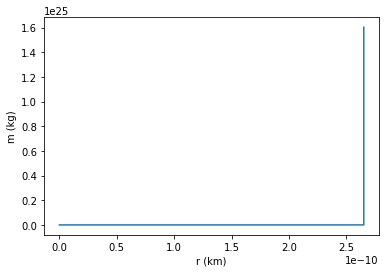

In [403]:
import numpy as np
import math
import matplotlib.pyplot as plot
from scipy.integrate import odeint

G = 1
k = 2
c = 1
GA = 0.5
pi = math.pi

#Units conversion  
Rs = (2*(6.67*10**-11)*(2*10**30))/((3*(10**8))**2)
# m = mt * (2*10**30)
# P = Pt * (1.6 *10**64)
# d = dt * (1.6 *10**64)

K1 = (4*pi*((Rs)**3)/((6*(10**30))*((9*10**16))))


def f(x,P):
   m,r = x
   d = (P/k)**(1/GA)
   dmdp = -(2*K1*(r**3)*d*(r-m))/((d + P)*(m + K1*P*(r**3)))
   drdp = (2*r*(r - m))/((d + P)*(m + K1*P*(r**3)))
   return [dmdp , drdp]

#Conversion pascal to GeV\fm^3
C = (6.2)*(10**(-54))

#Initials
Ro = R0(Pc = 0.01*C,  dp = 10**(-6)*C)
Mo = M0(Pc = 0.01*C,  dp = 10**(-6)*C)

x0 = [Mo,Ro]

P = np.linspace((10**(-6)*C),0,100000)

solve = odeint(f,x0, P)

m =solve[:,0]
r = solve[:,1]

plot.plot(m,r)
plot.xlabel("r (km)")
plot.ylabel("m (kg)")
#plot.ylim(0,0.25*10**-6)